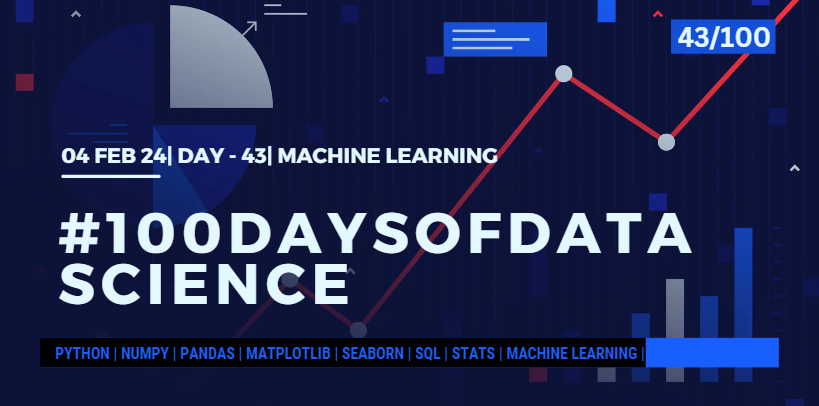

# <center>Linear Regression<center><hr style="border:4.5px solid #108999"> </hr>
 

* Linear regression is an algorithm that provides a linear relationship between an independent variable and a dependent variable to predict the outcome of future events. 
* It is a statistical method used for predictive analysis.
* Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.   
* Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. 
* Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.<br>
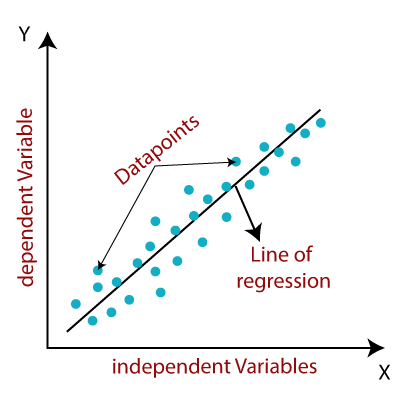


<center><b>y= a0+a1x+ ε</b></center><br>

Here,
* Y= Dependent Variable (Target Variable)
* X= Independent Variable (predictor Variable)
* a0= intercept of the line (Gives an additional degree of freedom)
* a1 = Linear regression coefficient (scale factor to each input value).
* ε = random error

The values for x and y variables are training datasets for Linear Regression model representation.

A linear line showing the relationship between the dependent and independent variables is called a regression line. A regression line can show two types of relationship:<br>

    1. Positive Linear Relationship:
If the dependent variable increases on the Y-axis and independent variable increases on X-axis, then such a relationship is termed as a Positive linear relationship.<br>

    2. Negative Linear Relationship:
If the dependent variable decreases on the Y-axis and independent variable increases on the X-axis, then such a relationship is called a negative linear relationship.<br>



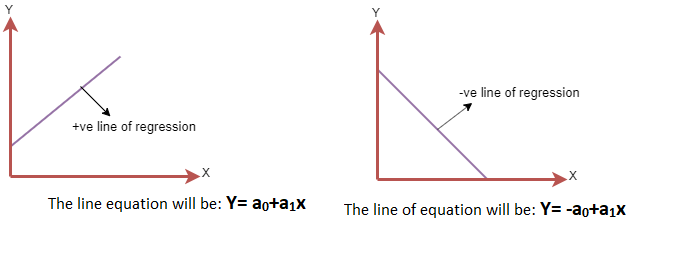

* When working with linear regression, our main goal is to find the best fit line that means the error between predicted values and actual values should be minimized. 
* The best fit line will have the least error.
* The different values for weights or the coefficient of lines (a0, a1) gives a different line of regression, so we need to calculate the best values for a0 and a1 to find the best fit line, so to calculate this we use cost function.

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 43\Advertising.csv', header = 0, index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape ### Checking Shape

(200, 4)

In [4]:
df.describe() ### Get information of the Dataset

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.columns ### Checking Columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

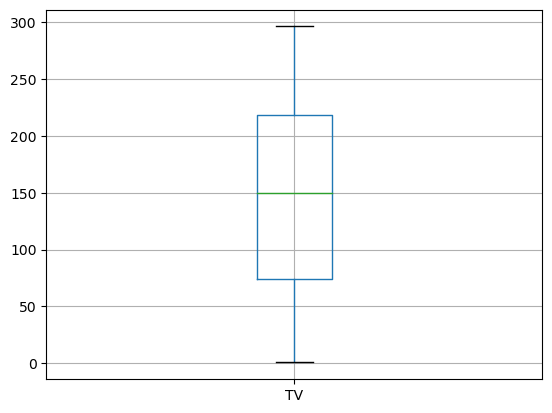

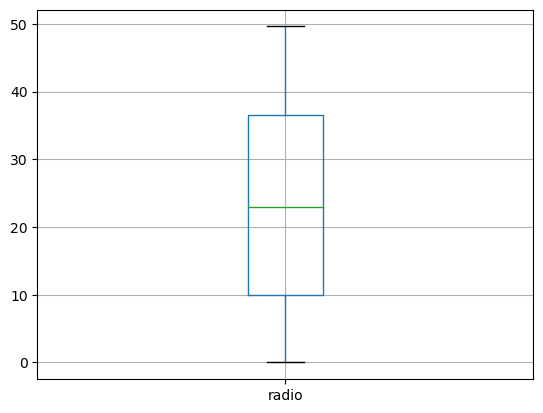

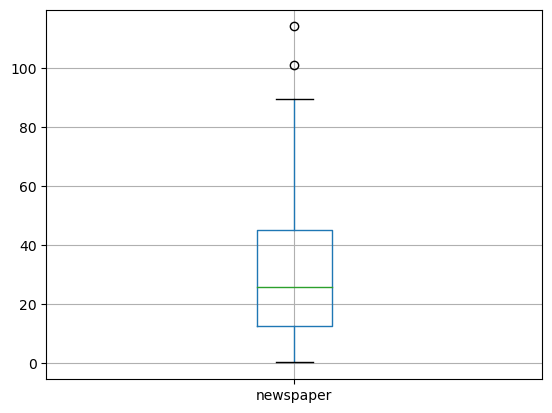

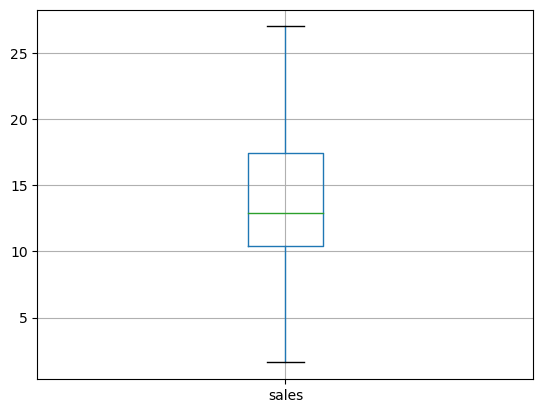

In [8]:
### There should be no outliers in data checking using box plot
for i in df.columns:
    df.boxplot(column = i)
    plt.show()

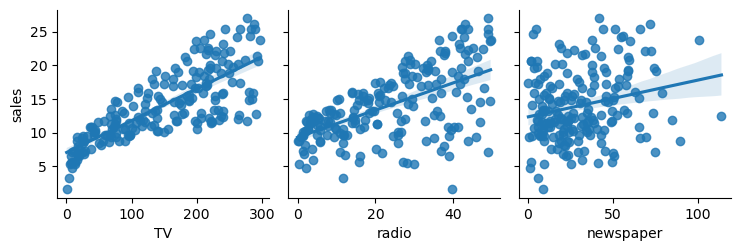

In [9]:
### Assumption of linearity: Every independent variable should have a relationship with the dependent variable
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='reg')
plt.show()

In [10]:
### Spliting Data into X and y
X = df[['TV','radio','newspaper']]
y = df['sales']
print(X.head())
print('*' * 28)
print(y.head())

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
****************************
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


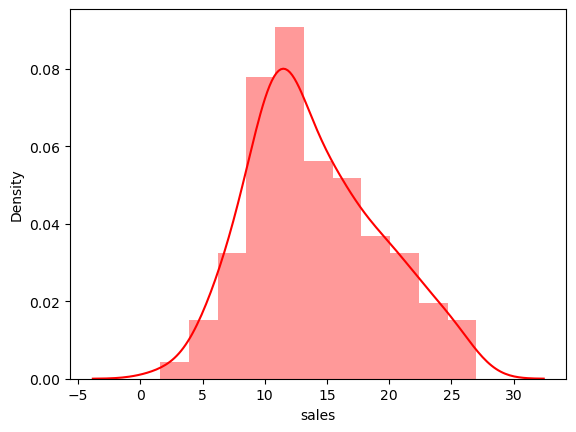

In [11]:
### Assumption of normality: The dependent variable should follow and approximate normal distribution
sns.distplot(y,hist=True,color='red')
plt.show()

In [12]:
### Checking whether the data is normally distributed or not
skew_check = skew(y) 
skew_check

0.4045082487061191

                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


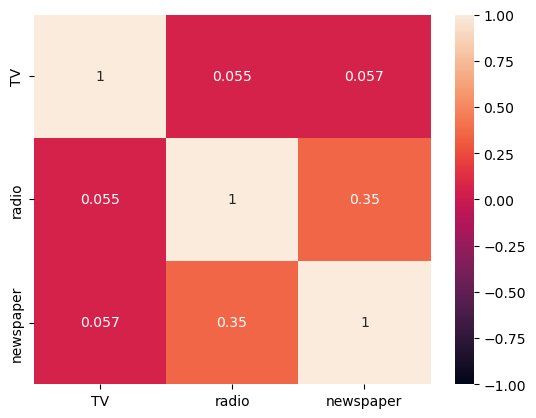

In [13]:
### Assumption of multicollinearity: There should be no multicollinearity between two independent variable
corr_df = X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1,vmin=-1,annot=True)
plt.show()

In [14]:
### Spliting into Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (160, 3)
X_test:  (40, 3)
y_train:  (160,)
y_test:  (40,)


In [15]:
#create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,y_train)

#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

3.2540971144188813
[ 0.0437726   0.19343299 -0.00222879]


In [16]:
#pairing the feature name with coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04377260306304603), ('radio', 0.19343298611600773), ('newspaper', -0.0022287928056053644)]


In [17]:
#predict using the model
y_pred = lm.predict(X_test)
print(y_pred)

[18.1625299  12.92663232 18.0531098  23.64464668 20.70438374 14.28227997
 14.94493548 21.38232981 21.17508238 12.73110461 24.00312134  7.21544071
 12.24762152 19.24345998 19.38241854 13.45643798 19.6247089   9.2531648
 21.13268075 20.90762408 15.53485445 10.92529369 22.82955184 15.8122438
 17.42515749  8.16218669 11.89783444 12.70337575 21.74138085  7.96215368
 12.50099965 20.45535282  4.72120047  4.72259288 16.75292333 15.75804986
  6.74415499 17.73477354  9.01591827 13.617599  ]


In [18]:
lm.score(X_train,y_train)

0.9209087553499528

In [21]:
new_df = pd.DataFrame()
new_df = X_test

new_df['Actual_Sales'] = y_test
new_df['Predicted_Sales'] = y_pred

new_df.head()

,TV,radio,newspaper,Actual_Sales,Predicted_Sales
60,210.7,29.5,9.3,18.4,18.162530
6,8.7,48.9,75.0,7.2,12.926632
21,218.4,27.7,53.4,18.0,18.053110
199,283.6,42.0,66.2,25.5,23.644647
53,216.4,41.7,39.6,22.6,20.704384


In [20]:
# Checking r2 score for the model
r2 = r2_score(y_test,y_pred)
print("R-squared: ",r2)

# Checking rmse score for the model
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmse)

# Checking adj. r2 score for the model
adjusted_r_squared = 1 - (1 - r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print("Adj R-squared: ",adjusted_r_squared)

R-squared:  0.8353672324670594
RMSE:  2.58852984462781
Adj R-squared:  0.8328473431680857
